In [1]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier

In [2]:
train_data = pd.read_csv("Data/train.csv")
test_data = pd.read_csv("Data/test.csv")

In [3]:
y_train = train_data["Survived"]
train_data.drop(labels="Survived", axis=1, inplace=True)

In [4]:
full_data = train_data.append(test_data)

In [5]:
drop_columns = ["Name", "Age", "SibSp", "Ticket", "Cabin", "Parch", "Embarked"]
full_data.drop(labels=drop_columns, axis=1, inplace=True)

In [6]:
full_data = pd.get_dummies(full_data, columns=["Sex"])
full_data.fillna(value=0.0, inplace=True)

In [7]:
X_train = full_data.values[0:891]
X_test = full_data.values[891:]

In [8]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [10]:
 X_train, X_val, y_train, y_val = train_test_split(X_train, y_train,  
    test_size=0.30, random_state=101) 

In [9]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

In [10]:
gradientclassifieror=GradientBoostingClassifier()

In [17]:
LR={'learning_rate':[0.15,0.10,0.5,0.05,0.01,0.005,0.001],'n_estimators':[50,100,150,400,500,600]}
tuning =GridSearchCV(estimator=GradientBoostingClassifier(),param_grid=LR,scoring='accuracy')
tuning.fit(X_train,y_train)
tuning.best_params_,tuning.best_score_

({'learning_rate': 0.05, 'n_estimators': 150}, 0.8074193548387096)

In [11]:
gradientclassifier=GradientBoostingClassifier(max_depth=8,n_estimators=150,learning_rate=0.05,max_features='sqrt',min_samples_split= 0.18)

In [12]:
model =gradientclassifier.fit(X_train,y_train)



In [13]:
model.score(X_train, y_train)     #Training accuracy


0.8900112233445566

In [16]:
v_data = pd.read_csv("Data/gender_submission.csv")

In [32]:
y_v = v_data["Survived"]
y_v


0      0
1      1
2      0
3      0
4      1
      ..
413    0
414    1
415    0
416    0
417    0
Name: Survived, Length: 418, dtype: int64

In [18]:
y_pred=model.predict(X_test)
accuracy_score(y_v, y_pred)

0.8038277511961722

In [35]:
print("Confusion Matrix:")
cf_matrix=confusion_matrix(y_v,y_pred)
print(cf_matrix)

print("Classification Report")
print(classification_report(y_v,y_pred))

Confusion Matrix:
[[218  48]
 [ 34 118]]
Classification Report
              precision    recall  f1-score   support

           0       0.87      0.82      0.84       266
           1       0.71      0.78      0.74       152

    accuracy                           0.80       418
   macro avg       0.79      0.80      0.79       418
weighted avg       0.81      0.80      0.81       418



<AxesSubplot:>

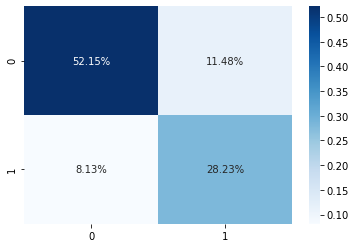

In [37]:
import seaborn as sns
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')


In [26]:
import numpy as np

In [31]:

a = np.asarray(y_pred)
np.savetxt("submission.csv", a, delimiter=",")

In [38]:
import pickle


In [39]:
Pkl_Filename = "Titanic_Survival.pkl"  

with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(model, file)
